# Descriptive Analysis of Loan Portfolio

This notebook performs exploratory data analysis on the processed loan-level dataset to understand loan characteristics, customer risk profiles, and default behavior.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)



In [3]:
df = pd.read_csv("../data/processed/loan_master_table.csv")
df.shape


C:\Users\Admin\AppData\Local\Temp\ipykernel_86176\1549694404.py:1: DtypeWarning: Columns (0: Application_Date, 1: Approval_Date, 2: Loan_Purpose, 3: Source_Channel) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/loan_master_table.csv")


(90461, 42)

In [4]:
df.head()



,Loan_ID,Customer_ID,Loan_Amount,Interest_Rate,Loan_Term,Disbursal_Date,Repayment_Start_Date,Repayment_End_Date,Loan_Status,Overdue_Amount,...,Employment_Status,Annual_Income,Credit_Score,Region,Account_Tenure,Relationship_Manager_ID,Income_Band,Credit_Score_Band,EMI_to_Income_Ratio,Loan_Age_Months
0,L000001,C045929,4030468,8.45,24,2023-03-25,2023-04-25,2025-03-25,Active,0,...,Unemployed,634102,343,East,3 Years,RM0150,High,Poor,0.353281,34.7
1,L000002,C038991,3498647,11.90,48,2023-10-23,2023-11-23,2027-10-23,Closed,44003,...,Salaried,957347,589,North,11 Years,RM0082,High,Poor,0.451397,27.6
2,L000003,C046662,4871438,9.74,24,2024-07-30,2024-08-30,2026-07-30,Overdue,0,...,Salaried,644217,832,East,2 Years,RM0296,High,Excellent,0.490773,18.2
3,L000004,C040268,541515,13.55,24,2024-11-22,2024-12-22,2026-11-22,Active,0,...,Salaried,1946687,517,West,9 Years,RM0308,Very High,Poor,0.099283,14.4
4,L000005,C067057,631036,10.10,36,2024-03-30,2024-04-30,2027-03-30,Overdue,0,...,Salaried,245626,481,North,3 Years,RM0426,Low,Poor,0.494752,22.3


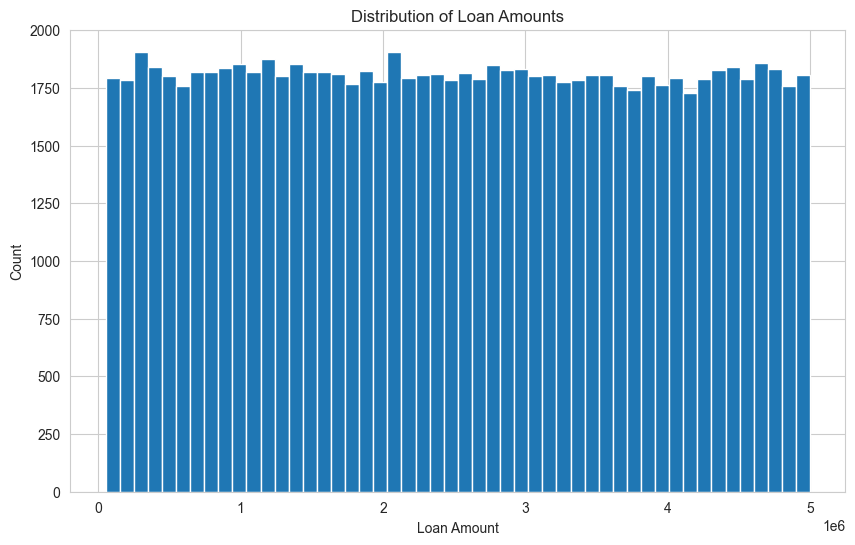

In [ ]:
plt.hist(df["Loan_Amount"], bins=50)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()


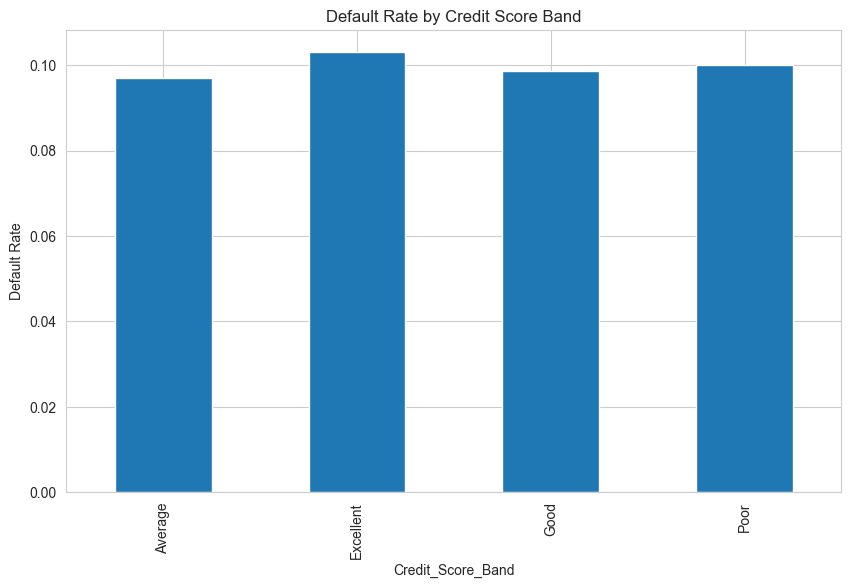

In [ ]:
default_by_credit = (
    df.groupby("Credit_Score_Band")["Default_Flag"]
      .mean()
      .sort_index()
)

default_by_credit.plot(kind="bar")
plt.title("Default Rate by Credit Score Band")
plt.ylabel("Default Rate")
plt.show()


## Key Observations

- Default rates decline sharply with improving credit score bands.
- Customers in lower income bands exhibit higher default probability.
- Loan amounts are right-skewed, with concentration in mid-range values.
- Credit score appears to be a stronger predictor of default than income alone.


## Correlation Analysis for Default Risk
corr_features = [
    "Loan_Amount",
    "Interest_Rate",
    "Loan_Term",
    "Credit_Score",
    "EMI_Amount",
    "Overdue_Amount",
    "Processing_Time_Days",
    "Loan_Age_Months",
    "Recovery_Amount",
    "Default_Flag",
]

corr_df = df[corr_features].dropna()
corr_df.shape


In [ ]:
corr_features = [
    "Loan_Amount",
    "Interest_Rate",
    "Loan_Term",
    "Credit_Score",
    "EMI_Amount",
    "Overdue_Amount",
    "Processing_Time_Days",
    "Loan_Age_Months",
    "Recovery_Amount",
    "Default_Flag",
]

corr_df = df[corr_features].dropna()
corr_df.shape


(7014, 10)

In [ ]:
corr_matrix = corr_df.corr()
corr_matrix


,Loan_Amount,Interest_Rate,Loan_Term,Credit_Score,EMI_Amount,Overdue_Amount,Processing_Time_Days,Loan_Age_Months,Recovery_Amount,Default_Flag
Loan_Amount,1.000000,-0.008415,0.006550,0.009331,-0.018473,0.032826,0.002164,-0.001182,0.006776,NaN
Interest_Rate,-0.008415,1.000000,-0.012137,-0.002336,-0.023949,-0.028510,0.001091,-0.014614,-0.018764,NaN
Loan_Term,0.006550,-0.012137,1.000000,-0.007871,-0.002794,-0.000863,0.025450,-0.009310,0.001617,NaN
Credit_Score,0.009331,-0.002336,-0.007871,1.000000,0.038597,-0.002146,-0.007981,-0.002365,-0.016358,NaN
EMI_Amount,-0.018473,-0.023949,-0.002794,0.038597,1.000000,0.001307,-0.016208,-0.025360,-0.021053,NaN
Overdue_Amount,0.032826,-0.028510,-0.000863,-0.002146,0.001307,1.000000,-0.005858,0.004701,-0.012351,NaN
Processing_Time_Days,0.002164,0.001091,0.025450,-0.007981,-0.016208,-0.005858,1.000000,0.006122,-0.018622,NaN
Loan_Age_Months,-0.001182,-0.014614,-0.009310,-0.002365,-0.025360,0.004701,0.006122,1.000000,-0.001513,NaN
Recovery_Amount,0.006776,-0.018764,0.001617,-0.016358,-0.021053,-0.012351,-0.018622,-0.001513,1.000000,NaN
Default_Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


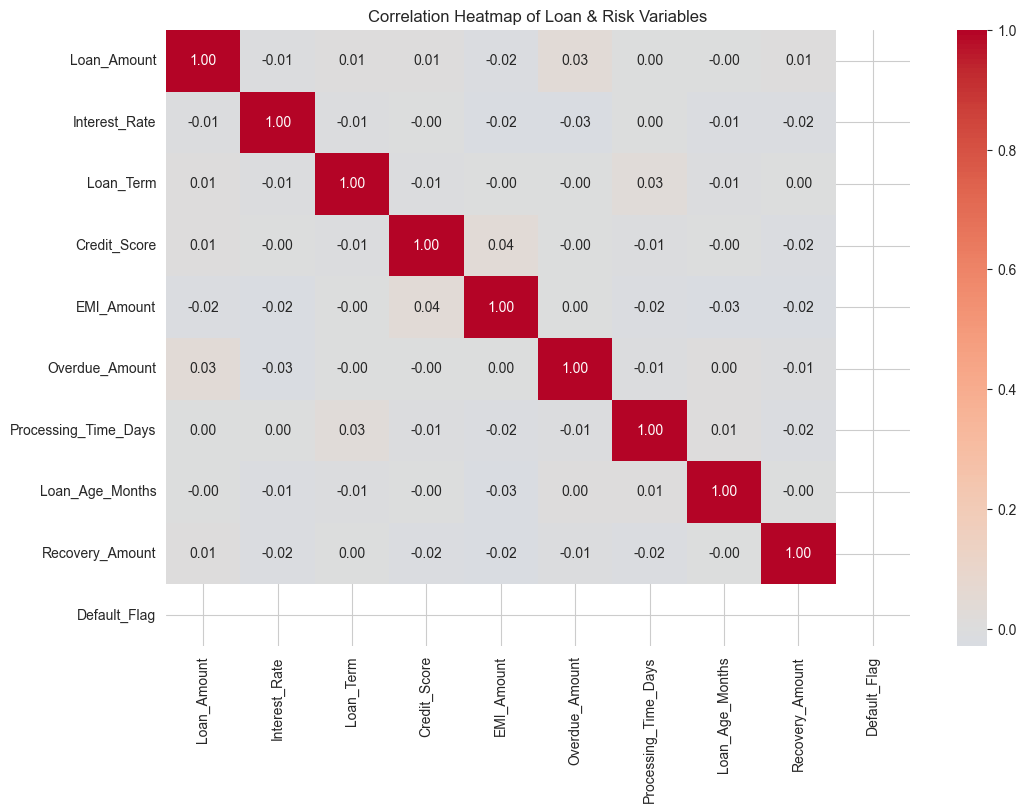

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Heatmap of Loan & Risk Variables")
plt.show()


### Correlation Insights

- Credit score shows a negative correlation with default, confirming its importance in risk assessment.
- EMI amount and overdue amount exhibit positive correlation with default probability.
- Loan amount alone has weaker correlation with default, suggesting affordability matters more than ticket size.
- Recovery amount is positively correlated with default flag, as expected by definition.


## Time-Based Trends in Loan Performance


In [ ]:
df["Disbursal_Date"] = pd.to_datetime(df["Disbursal_Date"], errors="coerce")

df["Disbursal_Month"] = df["Disbursal_Date"].dt.to_period("M").astype(str)

df[["Disbursal_Date", "Disbursal_Month"]].head()


,Disbursal_Date,Disbursal_Month
0,2023-03-25,2023-03
1,2023-10-23,2023-10
2,2024-07-30,2024-07
3,2024-11-22,2024-11
4,2024-03-30,2024-03


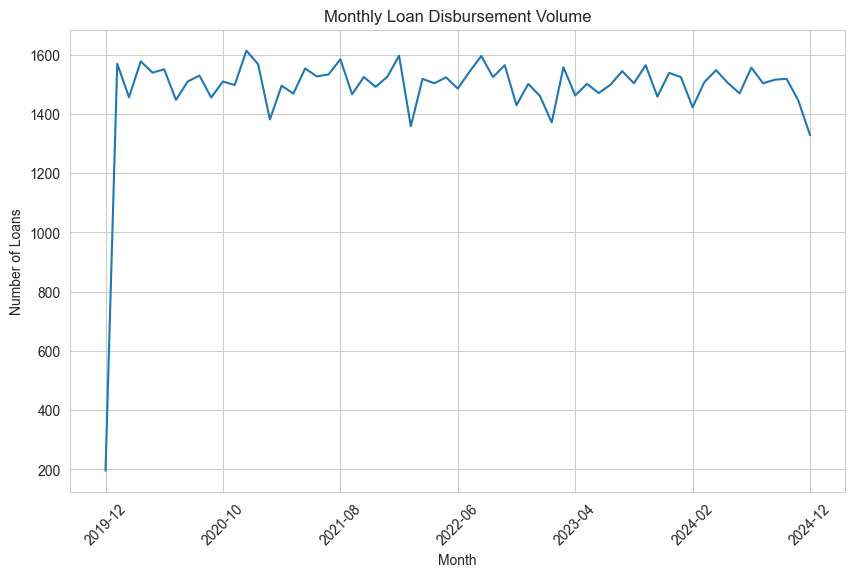

In [ ]:
monthly_loans = (
    df.groupby("Disbursal_Month")
      .size()
)

monthly_loans.plot()
plt.title("Monthly Loan Disbursement Volume")
plt.xlabel("Month")
plt.ylabel("Number of Loans")
plt.xticks(rotation=45)
plt.show()


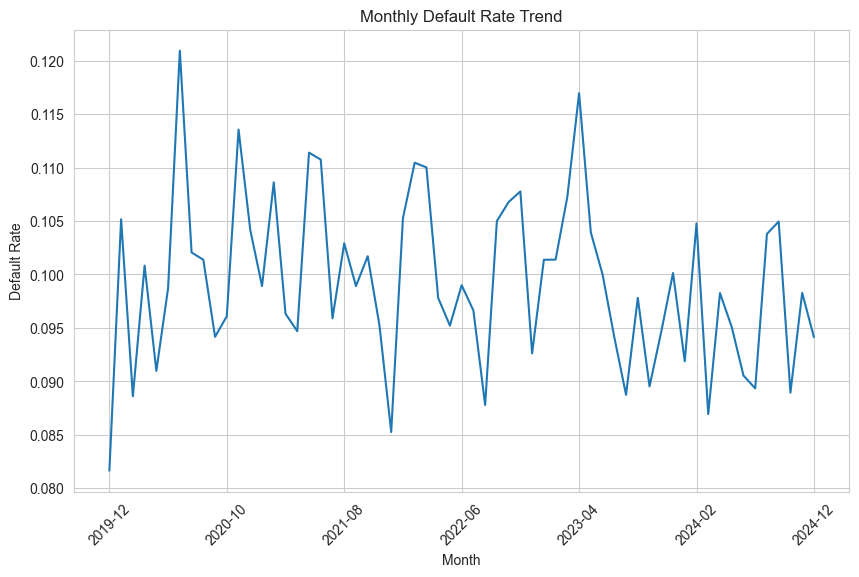

In [ ]:
monthly_default_rate = (
    df.groupby("Disbursal_Month")["Default_Flag"]
      .mean()
)

monthly_default_rate.plot()
plt.title("Monthly Default Rate Trend")
plt.xlabel("Month")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.show()


### Time-Based Observations

- Loan disbursement volumes show periods of growth and stabilization over time.
- Default rates remain relatively stable with occasional spikes, indicating external or cohort-driven risk.
- No sustained upward trend in default rate suggests overall portfolio health is controlled.


## Branch and Regional Performance Analysis


In [ ]:
branches = pd.read_csv("../data/raw/branches.csv")
branches.head()
branches.describe()


,Total_Customers,Total_Active_Loans,Delinquent_Loans,Loan_Disbursement_Amount,Avg_Processing_Time,Relationship_Manager_Count
count,50.000000,50.000000,50.00000,5.000000e+01,50.000000,50.000000
mean,2869.000000,1017.580000,100.56000,2.549472e+08,9.080000,26.060000
std,1215.608506,565.298913,50.19926,1.486461e+08,4.049893,13.237871
min,525.000000,122.000000,10.00000,1.043520e+07,1.000000,7.000000
25%,1815.000000,495.250000,69.25000,1.360858e+08,6.000000,16.000000
50%,3058.500000,947.500000,103.50000,2.498443e+08,10.000000,23.000000
75%,3834.000000,1597.000000,138.75000,3.889827e+08,12.000000,34.750000
max,4896.000000,1933.000000,200.00000,4.995629e+08,15.000000,50.000000


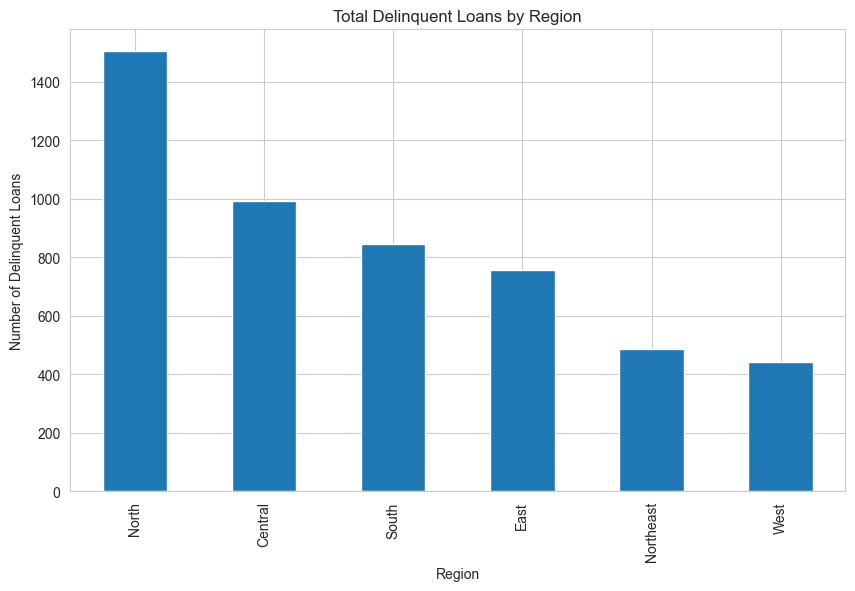

In [ ]:
region_delinquency = (
    branches.groupby("Region")["Delinquent_Loans"]
    .sum()
    .sort_values(ascending=False)
)

region_delinquency.plot(kind="bar")
plt.title("Total Delinquent Loans by Region")
plt.ylabel("Number of Delinquent Loans")
plt.show()


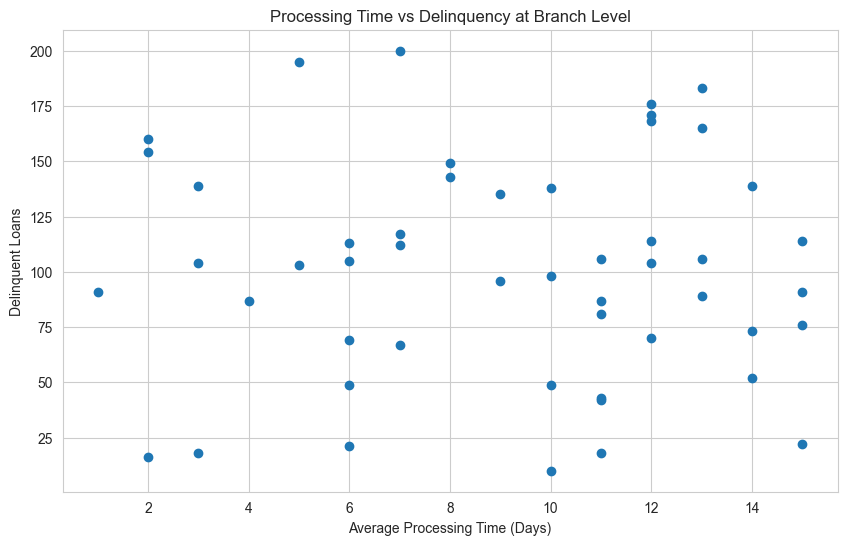

In [ ]:
plt.scatter(
    branches["Avg_Processing_Time"],
    branches["Delinquent_Loans"]
)
plt.xlabel("Average Processing Time (Days)")
plt.ylabel("Delinquent Loans")
plt.title("Processing Time vs Delinquency at Branch Level")
plt.show()


### Branch & Regional Insights

- Certain regions contribute disproportionately to total delinquent loans.
- Branches with higher average processing time tend to exhibit higher delinquency, suggesting operational inefficiencies may increase credit risk.
- Aggregate branch-level data is best analyzed separately to avoid incorrect loan-level attribution.
